#Creating the custom dataset and get my own data into pyTorch

#0. Importing pytorch and setting up the device-agnostic code


In [1]:
import torch
from torch import nn

#note: Pytorch 1.10+ is required for this step
torch.__version__

'2.6.0+cu124'

In [2]:
#setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get data for FOOD VISION MINI for our model

In [3]:
# important: Food 101 dataset search in google it has multiple data for food item and been train and tested
# we are working on small dataset comapre to Food101, we are using just 3-4classes of food an only 10% of images(75training, and 25 testing)

import requests
import zipfile
from pathlib import Path

#set path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exist... skipping download")
else:
  print(f"{image_path} does not exist, creating one..")
  image_path.mkdir(parents=True, exist_ok=True)

#Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:

  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") #just make sure we have raw file instead of blob in the link
  print("Downloading pizza, steak, sushi data")
  f.write(request.content)

#unzip pizz, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizz, steak and sushi data...")
  zip_ref.extractall(image_path) # in here it is extracting all the image file in the zip



data/pizza_steak_sushi does not exist, creating one..
Unzipping pizz, steak and sushi data...


In [4]:
#2. Becoming one with the data (data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f" There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

 There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
 There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
 There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
 There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
 There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
 There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
 There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
 There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
 There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [7]:
#Setup train and testing path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# 2.1 visualizing and image


1. get all of the image path
2. pick a random image path using python's random.choice()
3. Get the image class name using pathlib.path.parent.stem
4. since we working with images, lets open the image with python PILLOW
5. we then show the image and print metadata

In [8]:
image_path

PosixPath('data/pizza_steak_sushi')

data/pizza_steak_sushi/train/pizza/2576168.jpg
pizza
Random image path:data/pizza_steak_sushi/train/pizza/2576168.jpg
Image class:pizza
Image height:384
Image width:512


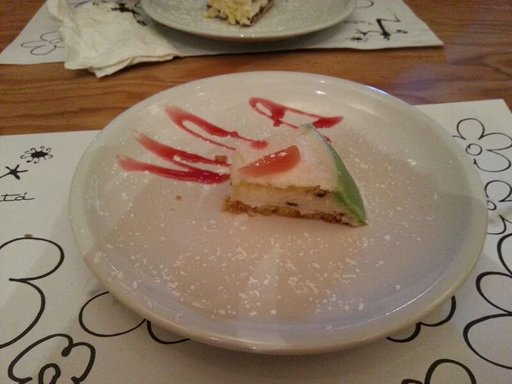

In [9]:
import random
from PIL import Image

#Set the seed
#random.seed(42)

#1.get all the images path
image_path_list = list(image_path.glob("*/*/*.jpg"))


# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. get image class from path name(the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path:{random_image_path}")
print(f"Image class:{image_class}")
print(f"Image height:{img.height}")
print(f"Image width:{img.width}")
img

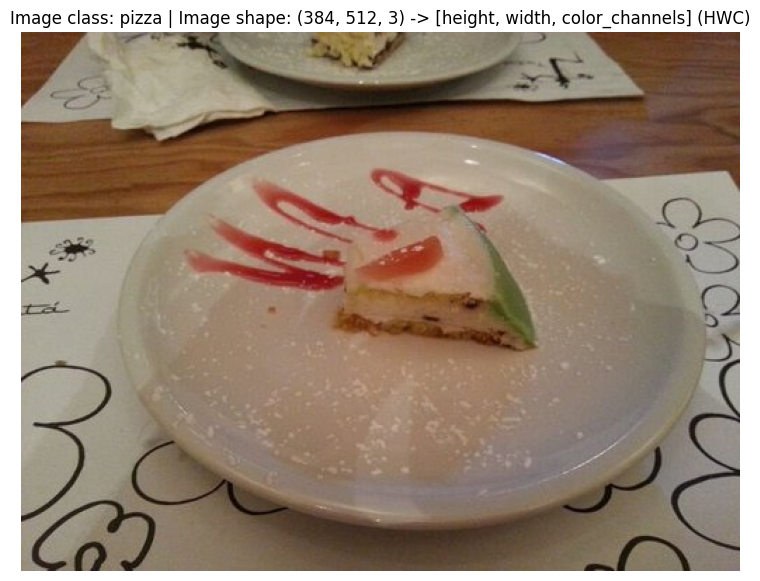

In [10]:
# Try to visualize and image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);


array([[[102,  65,  38],
        [102,  65,  36],
        [102,  65,  36],
        ...,
        [ 91,  56,  34],
        [ 90,  55,  33],
        [ 92,  57,  35]],

       [[ 97,  60,  33],
        [ 97,  60,  31],
        [ 97,  61,  29],
        ...,
        [ 90,  55,  33],
        [ 89,  54,  34],
        [ 90,  55,  33]],

       [[ 95,  58,  29],
        [ 95,  59,  27],
        [ 95,  59,  27],
        ...,
        [ 88,  56,  35],
        [ 88,  55,  36],
        [ 90,  58,  37]],

       ...,

       [[152, 140, 118],
        [153, 141, 119],
        [153, 142, 122],
        ...,
        [134, 120, 119],
        [134, 120, 119],
        [134, 120, 119]],

       [[149, 137, 113],
        [152, 140, 116],
        [153, 142, 120],
        ...,
        [134, 120, 120],
        [132, 118, 118],
        [131, 117, 117]],

       [[148, 136, 112],
        [152, 140, 116],
        [154, 143, 121],
        ...,
        [136, 122, 122],
        [134, 119, 122],
        [131, 116, 119]]], dtype=uint8)
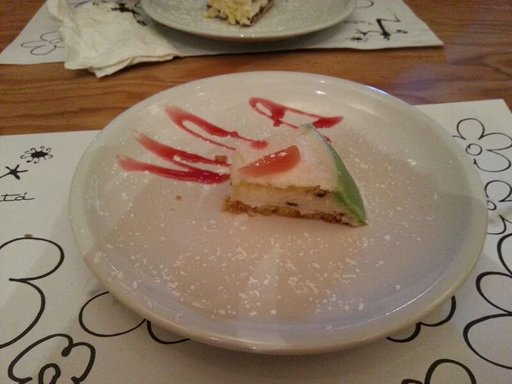

In [11]:
img_as_array

## 3. Transforming the data
Before we can use image data with Pytorch:
1. Turn the target data into the tensors( numerical representation of our images)
2. Turn it into a 'torch.utils.data.Dataset' and subsequentl a 'torch.utils.data.Dataloader', we call these 'Dataset' and 'DataLoader'

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



3.1 Trnasforming data with torchvision.transforms

In [13]:
# write the tranform for image
data_transform  = transforms.Compose([
    #Resise out images to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.3922, 0.3922, 0.4000,  ..., 0.3843, 0.3843, 0.3725],
         [0.4078, 0.4000, 0.4078,  ..., 0.3882, 0.4000, 0.3961],
         [0.4039, 0.4078, 0.4078,  ..., 0.4039, 0.4118, 0.4078],
         ...,
         [0.5451, 0.3922, 0.5961,  ..., 0.5255, 0.4706, 0.4118],
         [0.5412, 0.3569, 0.5333,  ..., 0.5294, 0.5333, 0.5294],
         [0.5843, 0.4431, 0.2784,  ..., 0.5216, 0.5294, 0.5294]],

        [[0.2431, 0.2275, 0.2275,  ..., 0.2353, 0.2431, 0.2392],
         [0.2431, 0.2314, 0.2353,  ..., 0.2549, 0.2627, 0.2627],
         [0.2275, 0.2353, 0.2471,  ..., 0.2745, 0.2667, 0.2627],
         ...,
         [0.5176, 0.3529, 0.5647,  ..., 0.4863, 0.4275, 0.3725],
         [0.5098, 0.3176, 0.4980,  ..., 0.4902, 0.4902, 0.4902],
         [0.5490, 0.4118, 0.2353,  ..., 0.4824, 0.4863, 0.4784]],

        [[0.1137, 0.1294, 0.1294,  ..., 0.1804, 0.1882, 0.1725],
         [0.1255, 0.1333, 0.1176,  ..., 0.1922, 0.1922, 0.2039],
         [0.1098, 0.1373, 0.1373,  ..., 0.2078, 0.1882, 0.

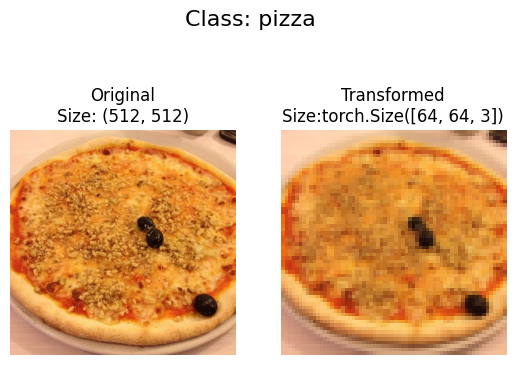

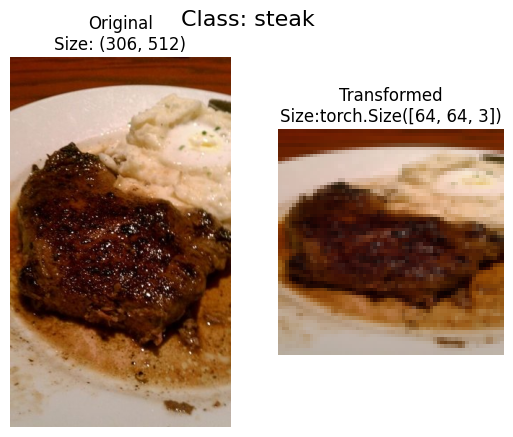

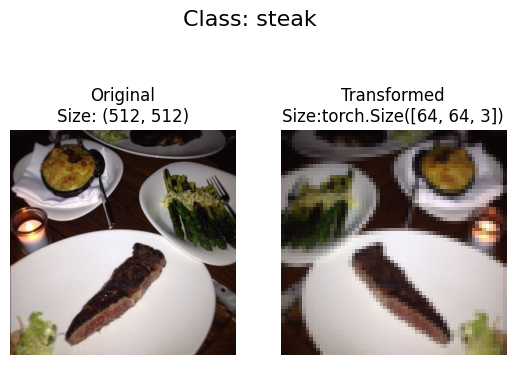

In [15]:
#HEre we are transforming the images list into the tensor transformed image
def plot_tranformed_images(images_paths: list, transform, n=3, seed=42):
  """
  Selectt random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_images_paths =random.sample(images_paths, k=n)
  for image_path in random_images_paths:
    with Image.open(image_path) as f:
      fig, ax =plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)


      #Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # we will need to change shape for matplotlib (C, H, W)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_tranformed_images(images_paths=image_path_list,
                       transform=data_transform,
                       n=3, #this will select 3 images from the list
                       seed=None) # if we set to none then it will show random images or if we set 42 then staic


#4. Options 1: Loading image data using ImageFolder
we can load image classification data using torchVision.datasets.ImageFolder

In [16]:
#USe ImageFolder to create dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transofrom for the data
                                  target_transform=None) # a transfrom for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [18]:

#GEt the class names
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [19]:
#Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
#Check the length of our dataset
len(train_data), len(test_data)

(225, 75)

In [21]:
train_data.samples[0] #below we are getting imagepath and the label for that image

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [22]:
#Index on the train_data Dataset to get a single image and label
img, label = train_data [1][0], train_data[1][1] #HEre we are getting the first image / also we can change to any other image here by metion 1,0 or 1,1
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image Label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.7020, 0.8157, 0.8902,  ..., 0.5059, 0.4902, 0.4902],
         [0.9686, 0.9843, 0.9961,  ..., 0.5098, 0.5098, 0.4980],
         [0.9961, 0.9961, 1.0000,  ..., 0.5176, 0.4667, 0.4431],
         ...,
         [0.5137, 0.4745, 0.4627,  ..., 0.5647, 0.5569, 0.5176],
         [0.4863, 0.4824, 0.4667,  ..., 0.5020, 0.4706, 0.4784],
         [0.5098, 0.5137, 0.4980,  ..., 0.5020, 0.4314, 0.4941]],

        [[0.6510, 0.7961, 0.8902,  ..., 0.2863, 0.2784, 0.2784],
         [0.9529, 0.9804, 0.9961,  ..., 0.2941, 0.2902, 0.2784],
         [0.9961, 0.9961, 1.0000,  ..., 0.2980, 0.2667, 0.2667],
         ...,
         [0.1529, 0.1529, 0.1686,  ..., 0.3176, 0.2549, 0.1804],
         [0.1373, 0.1412, 0.1373,  ..., 0.1255, 0.0980, 0.1098],
         [0.1765, 0.1765, 0.1569,  ..., 0.1373, 0.0824, 0.1529]],

        [[0.5490, 0.7137, 0.8706,  ..., 0.1176, 0.1137, 0.1059],
         [0.9176, 0.9608, 0.9882,  ..., 0.1216, 0.1255, 0.1216],
         [0.9882, 0.9922, 0.9961,  ..., 0.1

In [23]:
class_names[label] #Here we have covert to nonlabel to know the name of the image

'pizza'

Orginial shapes: torch.Size([3, 64, 64]) -> [color_channels,height, width]
IMage permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

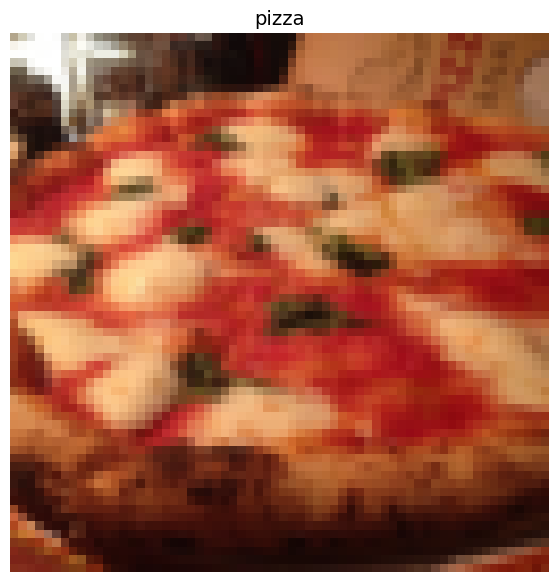

In [24]:
 #Rearrange the order dimensions
img_permute = img.permute(1,2,0)

#print out difference shapes
print(f"Orginial shapes: {img.shape} -> [color_channels,height, width]")
print(f"IMage permute: {img_permute.shape} -> [height, width, color_channels]")

#Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

#4.1 Turn loaded images into 'Dataloader's'

In [25]:
# Dataloader is going help us turn our "dataset into iterables and we can customise the batch_size so our model can see 'bactch_size' images at a time.


In [26]:
import os
os.cpu_count()

2

In [27]:
#Turn train and test datssets into Dataloader
from torch.utils.data import DataLoader
BATCH_SIZE =1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)
test_dataloader = DataLoader(dataset= test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ea83c2ab110>,
 <torch.utils.data.dataloader.DataLoader at 0x7ea83c43c1d0>)

In [28]:
len(train_dataloader), len(test_dataloader)


(225, 75)

In [29]:
img, label = next(iter(train_dataloader))

#Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Labeel shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Labeel shape: torch.Size([1])


from ast import Constant
## 5 option 2: loading image data with a Custom 'Dataset'
1. Want to be able to load images from file
2. want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from Dataset

Pros:
-Create a "Dataset" out of almost anyhting
-Not limited to pytorch pre-built 'Dataset' Function

Cons
- Even though you could create 'Dataset' out of almost anything, it doesn't mean it will work
- Using a custom 'Dataset' often results in us writing more code, which could be prone to errors or performance issue

- All custom datasets in Pytorch, often subclass: look for torch.utils.data.Dataset

In [30]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [31]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.1 Creating a helper functions to get the classes names
 1. GEt the class names using 'os.scandir()' to traverse a target directory(ideally the directory is in standard image classification format)
 2. Raise an error if the class names aren't found(if this happens, there might be something wrong with the directory structure)
 3. Turn the class name into a dict and a list and return them.  

In [32]:
#setup path for the target directory
target_directory =  train_dir
print(f"Target dir: {target_directory}")


# GEt the class names from the target directory
class_names_found =  sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [33]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [34]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Find the classses folder names in a target directory"""
  #1. Get the class names by sending the target directory

  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... Please check file structure")

  #3. Create a dictionary of index labels(Computers prefered number rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx



In [35]:
find_classes(target_directory) # Here we have created the same data as Imagefolder above and transfer the data through directory

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#5.2 Create a custom 'Dataset'to replace 'ÍmageFolder

## Create our own custom dataset. we want to :
1.Subclass 'torch.utils.data.Dataset'
2. Init our subclass with a target directory( the directory we like to get the data from) as well as we like to transform our data
3. Create several attributes:
 * path - paths of our image
 * transform  - the transform we like to use
 * classes -  a list of the target class
 * class_to_idx - a dict of the target classes mapped to integer labels

4. Create a functions to 'load_images()', this function will open an image
5. Overwrite the '__len()__' method to return the length of dataset
6. Overwrite the '__getitem()__' method to return a given sample when passed an index


In [36]:
# Write a custom dataset class
from torch.utils.data import Dataset


#1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #2. Initialize out custom dataset
  def __init__(self, targ_dir: str, transform=None):

  #3. Create class attributes
  #Get all of the images paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
  #Setup transforms
    self.transforms = transform
  #Create Classes and class_to_idx attribute
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image  via a path and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite __len()__
  def __len__(self) -> int:
    "Returns the total number of samples"
    return len(self.paths)

  #6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    #Return one sample of data, data and label(X, y)
    img = self.load_image(index)
    class_name = self.path[index].parent.name #expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    #Transform if necessary
    if self.transform:
      return self.transform(img), class_idx #return data, label(X,y)
    else:
      return img, class_idx #return untransformed image and label

In [37]:
# Create a transform
train_tranforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

In [38]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform = train_tranforms,
                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [39]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7ea83c2b1f50>,
 <__main__.ImageFolderCustom at 0x7ea83c4c9f10>)

In [40]:
len(train_data), len(train_data_custom)

(225, 225)

In [41]:
len(test_data), len(test_data_custom)

(75, 75)

In [42]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [43]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [44]:
# Check for equlity between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


#5.3 Create a function to display the random images

1. Take in a 'Dataset' and a number of other parameters such as class names and how many images to visualize
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a lost of random sample indexes from the target dataset
5. Setup a matplotlib plot
6. Loop through the random samples images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib(HWC)


In [50]:
#Create a function to take in a dataset
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes:List[str] = None,
                          n: int = 10,
                          display_shape:bool = True,
                          seed: int = None):

  #2. Adjust display if n is too high
  if n>10:
    n = 10
    display_shape = False
    print(f"For display, purposes, and shouldn't be larger than 10, setting to 10 and removing shape display.")

   # 3 . Set the seed
  if seed:
    random.seed(seed)

  #4. Get random samples indexes
  random_samples_idx = random.sample(range(len(dataset)),k=n)

  #5. Setup plot
  plt.figure(figsize=(16,8))

  #6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

  # 7. Adjust tensor dimensions for plottting
  targ_image_adjust = targ_image.permute(1,2,0)# [color_channels, height, width] -> [height, width, color_channels]

  #Plot adjusted samples
  plt.subplot(1,n, i + 1)
  plt.imshow(targ_image_adjust)
  plt.axis("off")
  if classes:
    title = f"Class: {classes[targ_label]}"
    if display_shape:
      title = title + f"\nShape: {targ_image_adjust.shape}"
  plt.title(title)



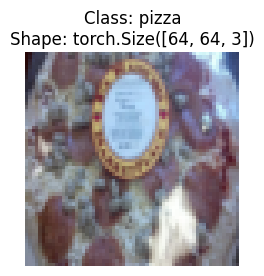

In [51]:
#Display random images from thje ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [48]:
random.sample(range(len(train_data_custom)),k=10)


[50, 62, 37, 151, 154, 38, 2, 101, 218, 75]